In [1]:
import dill as pickle
import matplotlib.pyplot as plt
import numpy as np
from model_hpc import get_data, accuracy_score
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as lng
import scipy.io as io
from sklearn.ensemble import BaggingClassifier, AdaBoostRegressor
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from pathlib import Path
import pandas as pd
import seaborn as sns
from sklearn.metrics import make_scorer
from sklearn.model_selection import TimeSeriesSplit
# import pickle
import os
# from sklearn.externals import joblib
import joblib
import dill as pickle

plt.style.use("seaborn")

In [14]:
X, X_train, X_val, y, y_train, y_val = get_data(test = False)
boost = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 24), learning_rate= 1, n_estimators=400)
boost.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=24),
                  learning_rate=1, n_estimators=400)

In [15]:
def relative_difference(y,y_hat):
    return (y-y_hat)/y
def accuracy(y,y_hat):
    return (1-np.abs(relative_difference(y,y_hat)))*100

def accuracy_score(y_true, y_pred, inv_trns = lambda x: x):
    return accuracy(y_true,inv_trns(y_pred)).mean()

accuracy_score(y_val, boost.predict(X_val))

64.47760642918159

63.531003966971305

## Prediction data

In [6]:
X, X_train, X_val, y, y_train, y_val = get_data(test = True)
X_train.shape, X_val.shape, X.shape
predictions = boost.predict(X_val)

(array([1.35992603, 0.57203238, 0.6259977 , 0.41013642, 0.7447214 ,
        0.31299885, 0.33458498, 0.32379191, 0.65837689, 0.49648093,
        0.80947978, 1.15485782, 1.09009943, 0.84185897, 1.11168556,
        0.97137573, 1.00375493, 0.88503122, 0.69075608, 1.09009943,
        0.7447214 , 0.7123422 , 0.78789365, 1.09009943, 1.58658037,
        0.9821688 , 0.84185897, 0.90661735, 1.09009943, 1.18723701,
        1.24120233, 1.51102892, 1.82402777, 1.2196162 , 2.10464742,
        1.9643376 , 2.15861274, 1.99671679, 1.79164858, 1.86720002,
        2.52557691, 1.58658037, 1.694511  , 1.28437458, 0.7447214 ,
        0.28061966, 0.28061966, 0.19427515, 0.2374474 , 0.02158613]),
 array([0.04285714, 0.06210753, 0.08135791, 0.10060829, 0.11985868,
        0.13910906, 0.15835945, 0.17760983, 0.19686022, 0.2161106 ,
        0.23536098, 0.25461137, 0.27386175, 0.29311214, 0.31236252,
        0.3316129 , 0.35086329, 0.37011367, 0.38936406, 0.40861444,
        0.42786482, 0.44711521, 0.46636559, 0.

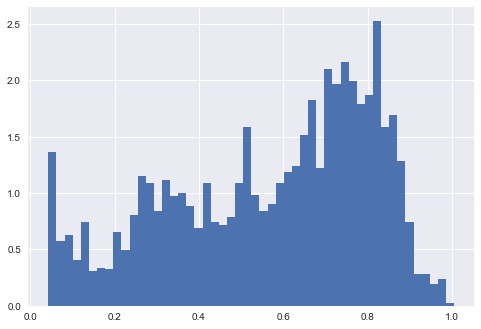

In [8]:
plt.hist(predictions, bins = 50, density = True)

In [17]:
data = pd.read_excel("Future Schedule 20220301-20220331.xlsx",engine='openpyxl')


In [21]:
data["LoadFactor"] = predictions
data.to_excel("predictions.xlsx")